In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov  4 07:02:45 2024

@author: robberto
"""

from astropy.io import fits
import matplotlib.pyplot as plt

import os
import shutil
import glob
import numpy as np
import pandas as pd
import copy
import heapq

from scipy.signal import find_peaks
import cv2

%matplotlib inline

## """ Instantiate the class with the correct directory name"""

In [3]:
data_path = "/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SISI"
from Class_SAMOS import SAMOS
SAMOS = SAMOS(data_path) 

working on the directory: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SISI


### Check the files you want to process here
https://www.stsci.edu/~robberto/Main/SAMOS/Run_October2024/SAMI/QL_20241017/overview.html

## SELECT A TARGET AND INSPECT THE FILES YOU MAY WANT TO USE. ANNOTATE BELOW

In [6]:
# DATA ANALYSIS 
target_name = "ABELL3120"
target_mode  = "SAMI_manual_Mask_T00_Low_Red"

"""
=> Night 20241017
TARGET = target.025.fits [600s], target.026.fits [600s], target.027.fits [600s]
FLATS  = target.028.fits [2s], calibration.029.fits [2s]
ARC_Ne = calibration.033.fits [10s]
ARC_HgAr = calibration.030.fits [8s]
ARC_HgArNe = calibration.031.fits   [10s], calibration.032.fits [8s]  
ARC_Ne_DMDoff = calibration.034.fits [8s]
ARC_HgAr_DMDoff = calibration.036.fits [8s]
ARC_HgArNe_DMDoff = calibration.035.fits [8s]

=> Night 20241016
BIAS =  bias.055.fits - bias.074.fits 

=> Night 20241016
FLATS_DMDoff = flat019.fits [0.1s]; flat.020.fits[1s]
"""

"""
SISI:
=> Night 20241018
TARGET = sci_SLOAN-i_ABELL3120_0082_QL.fits [30s, NO SLITS] 
         sci_SLOAN-i_ABELL3120_0083_QL.fits [3s, WITH SLITS],  
         sci_SLOAN-i_ABELL3120_0085_COADD_QL.fits [2X300=600s, WITH SLITS]
         sci_SLOAN-i_ABELL3120_0087_COADD_QL.fits [2X300=600s, WITH SLITS]
         sci_SLOAN-i_ABELL3120_0089_COADD_QL.fits [2X300=600s, WITH SLITS]
         
"""

'\nSISI:\n=> Night 20241018\nTARGET = sci_SLOAN-i_ABELL3120_0082_QL.fits [30s, NO SLITS] \n         sci_SLOAN-i_ABELL3120_0083_QL.fits [3s, WITH SLITS],  \n         sci_SLOAN-i_ABELL3120_0085_COADD_QL.fits [2X300=600s, WITH SLITS]\n         sci_SLOAN-i_ABELL3120_0087_COADD_QL.fits [2X300=600s, WITH SLITS]\n         sci_SLOAN-i_ABELL3120_0089_COADD_QL.fits [2X300=600s, WITH SLITS]\n         \n'

In [7]:
#CREATE A WORKING DIRECTORY WITH THE TARGET NAME IF IT DOES NOT EXIST
analysis_top_directory ="/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS"
working_directory = os.path.join(analysis_top_directory,target_name,target_mode)

# if the folder already exists in new directory
if not os.path.exists(working_directory):
        os.makedirs(working_directory)
os.chdir(working_directory) 
print(working_directory)

#DATA DIRECTORIES WHERE THE SAMOS FILES ARE STORED
data_directory = "/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SISI"
data_directory_18 = data_directory + "/SAMOS_20241018"


/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red


## READ THE SLITLESS IMAGE

In [9]:
#FIRST STEP: READ AND MOVE THE FILES
File_type = "TARGET"
#File_NR = '027'
#file  = os.path.join(data_directory_17,'target.'+File_NR+'.fits')
file =os.path.join(data_directory_18,"sci_SLOAN-i_ABELL3120_0082.fits")
print(file)

#hdu = SAMOS.read_SAMI_mosaic(file)
#hdu = fits.read(file)
#Target_Spectra = hdu.data
#hdu.data = Target_Spectra

with fits.open(file) as hdul:
    # Access the primary HDU (header data unit)
    primary_hdu = hdul[0]

    # Access the data array in the primary HDU
    data = primary_hdu.data

    # Access the header of the primary HDU
    header = primary_hdu.header

/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SISI/SAMOS_20241018/sci_SLOAN-i_ABELL3120_0082.fits


In [10]:
print(header)

SIMPLE  =                    T / Nonstandard                                    BITPIX  =                   16 / Bits/Pixel (unsigned 16-bit data)              NAXIS   =                    2 / Number of Axes                                 NAXIS1  =                 1056 / Length of Axis 1 (Serial)                      NAXIS2  =                 1032 / Length of Axis 2 (Parallel)                    INSTRUME= 'Spectral Instruments, Inc. 850-406 camera'                           N_PARAM =                   60 / Number of Parameters                           PARAM1  =                    0 / Image Type                                     PARAM2  =                30000 / Exposure Time                                  PARAM3  =                 1880 / CCD Temperature Setpoint                       PARAM4  =                   20 / Shutter Close Delay                            PARAM5  =                    0 / Server Data Source                             PARAM6  =                    6 / Server 

In [11]:
#make a copy of the invoice to work with
#destination=File_type+'.fits'
#shutil.copy(file,destination)
#hdul = fits.HDUList([hdu]) ; hdul.writeto(destination,overwrite=True)

In [12]:
#correct for cosmic rays with la_cosmic
# = SAMOS.CR_correct(Target_Spectra)

In [13]:
#restore correct orientation on sky
data = np.flip(data,0)
#plt.imshow(origin="lower")

(1032, 1056)


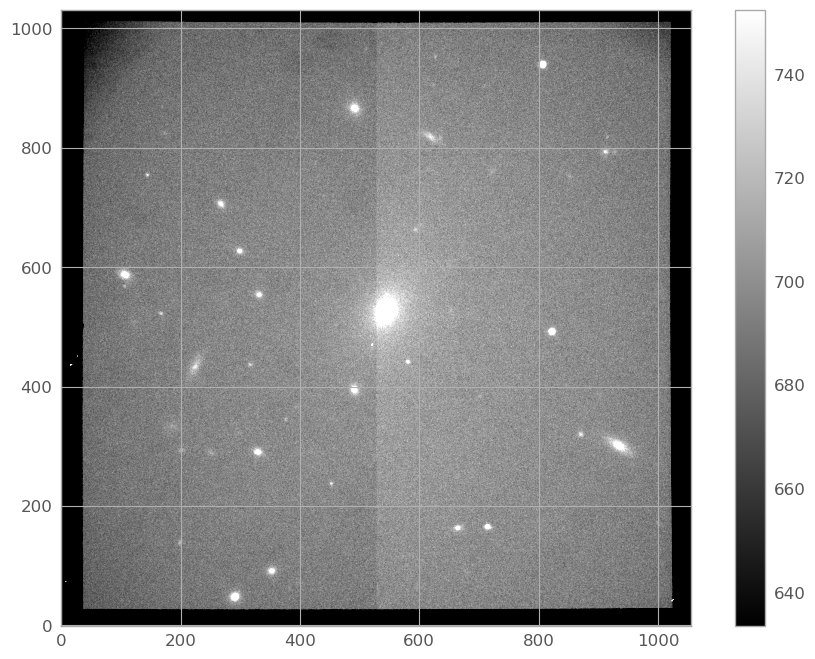

In [14]:
# display setting the limits for the gray scale
median = np.median(data)
stddev = np.std(data)
z0 = median-stddev
z1 = median+stddev
print(data.shape)
SAMOS.display_image(data,zmin=z0,zmax=z1)

In [15]:
target_list_pix_file = 'ABELL_3120-T00_executed_SISIpix.txt'
target_list_pix = os.path.join(analysis_top_directory,target_name,'Targets',target_list_pix_file)
print((target_list_pix))
import csv

with open(target_list_pix, 'r') as file:
    reader = csv.reader(file)
    array_2d = list(reader)

print(array_2d)
print(np.array(array_2d[0], dtype=int))

/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/Targets/ABELL_3120-T00_executed_SISIpix.txt
[['292', '983'], ['353', '940'], ['714', '866'], ['491', '636'], ['226', '598'], ['821', '539'], ['544', '506'], ['331', '476'], ['107', '442'], ['300', '403'], ['269', '324'], ['911', '237'], ['493', '164'], ['807', '92']]
[292 983]


292 49


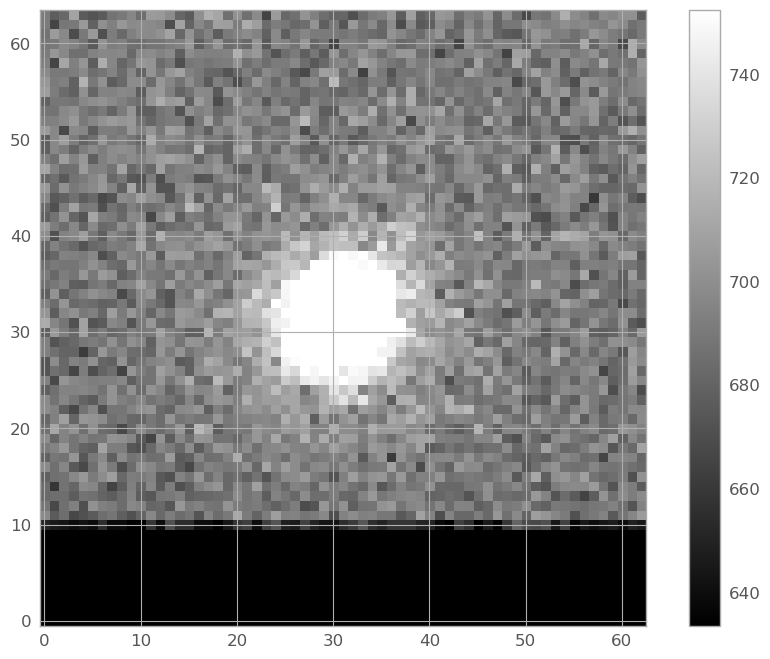

In [16]:
x,y = np.array(array_2d[0], dtype=int)#array_2d[0]
y = 1032-y
print(x,y)
SAMOS.display_image(data[y-32:y+32,x-32:x+31],zmin=z0,zmax=z1)

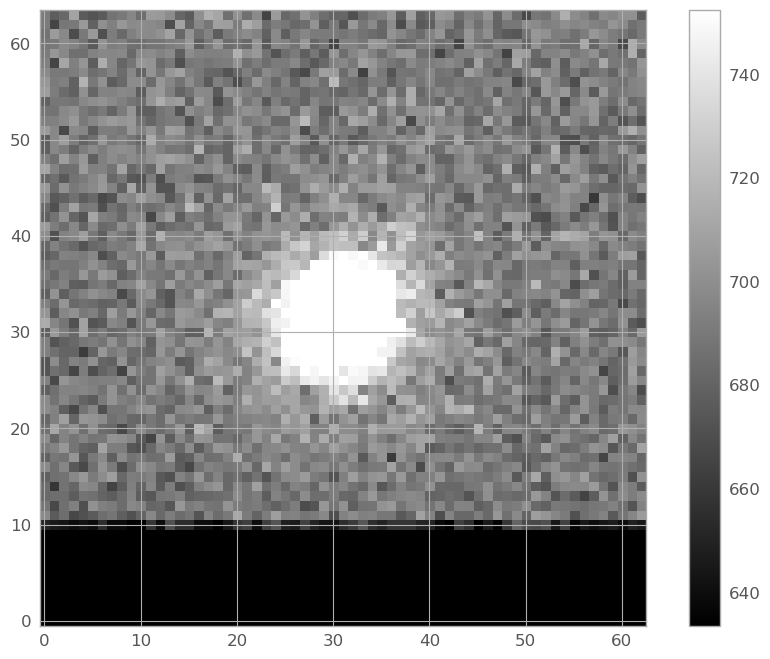

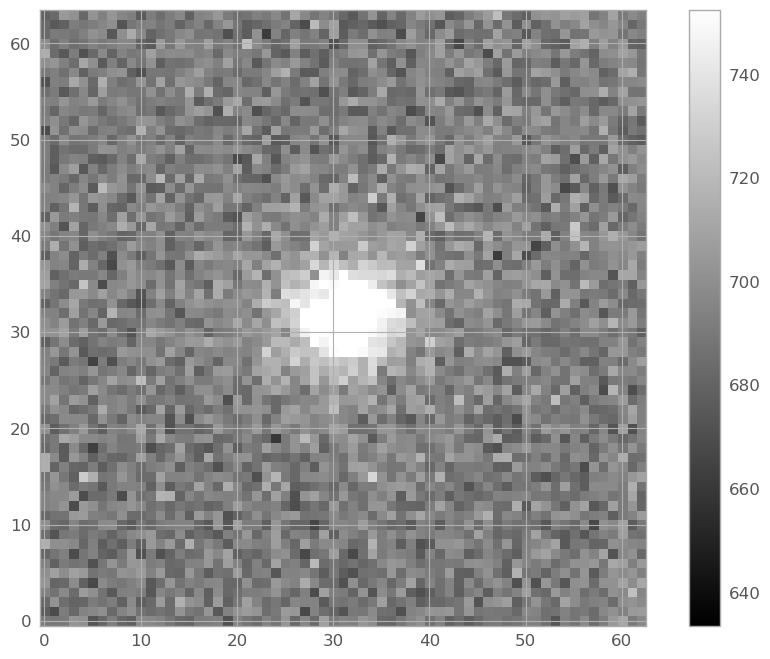

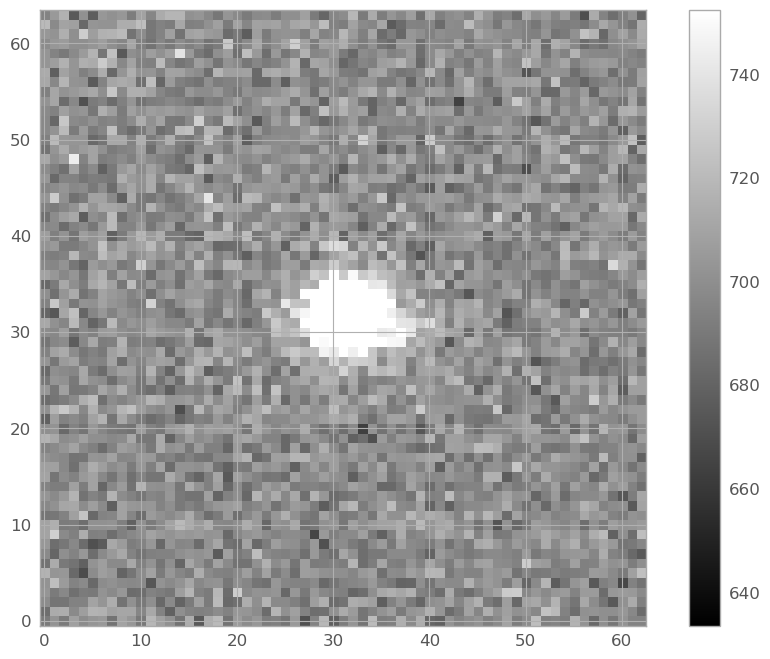

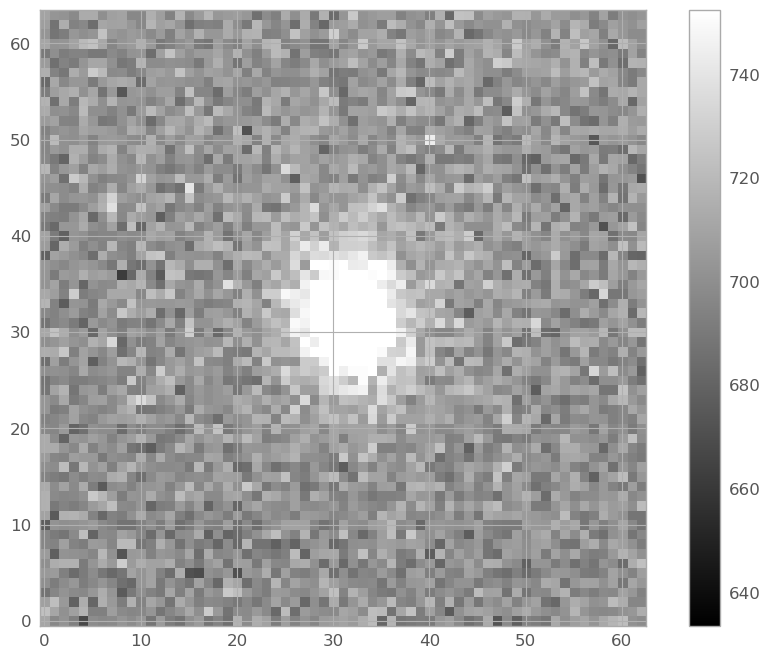

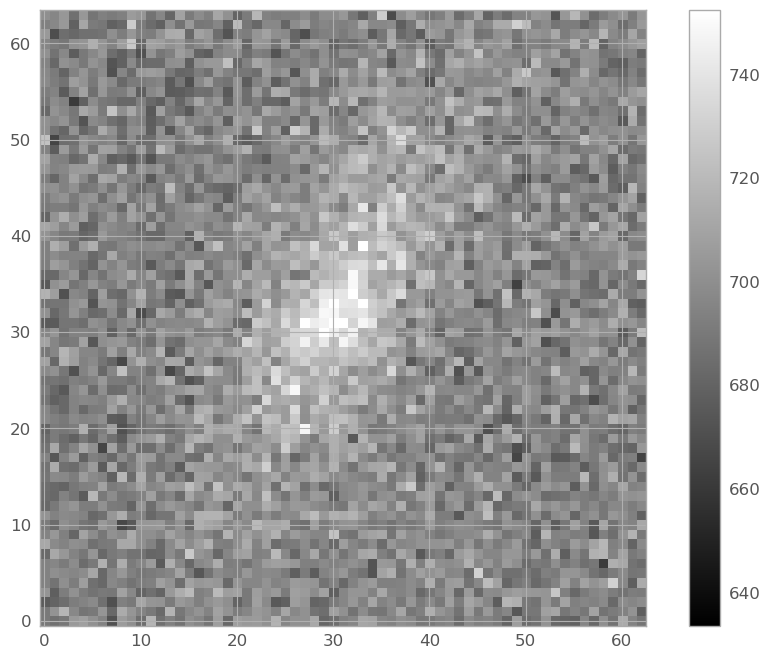

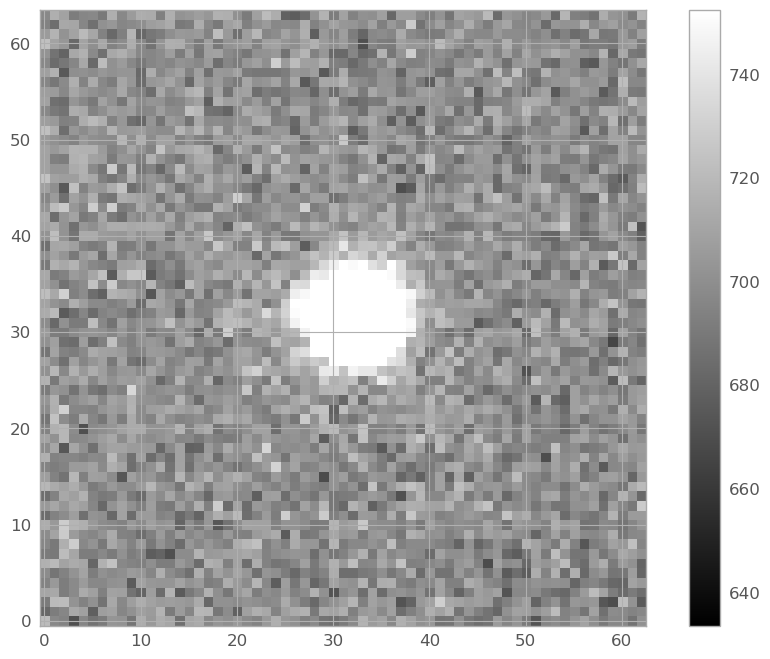

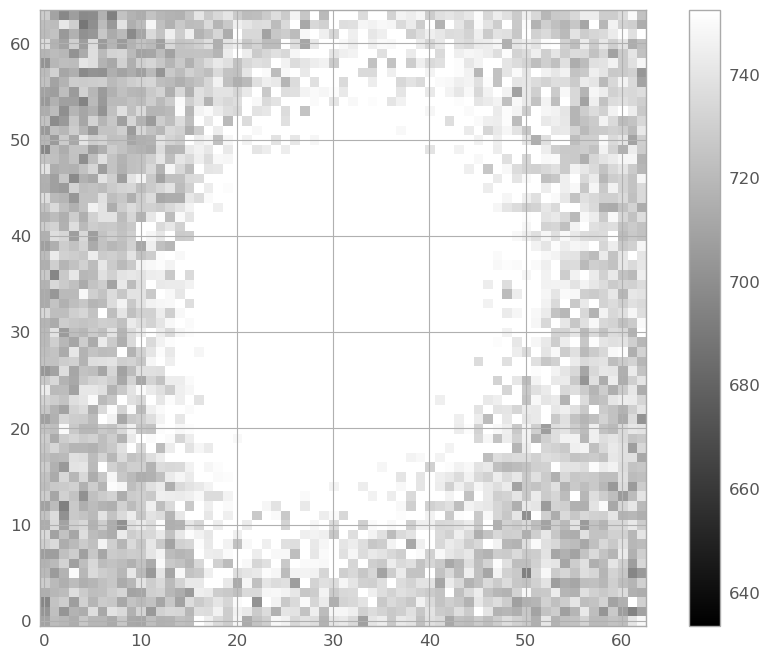

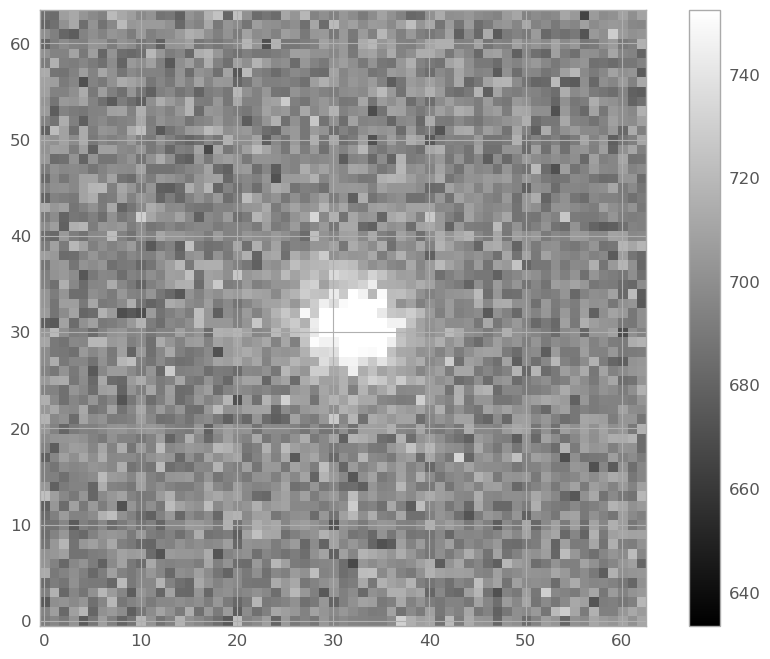

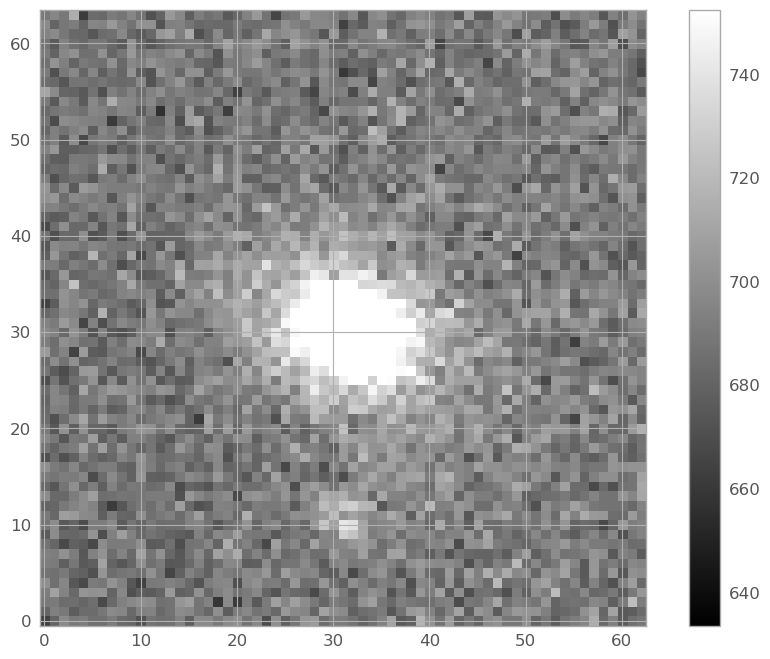

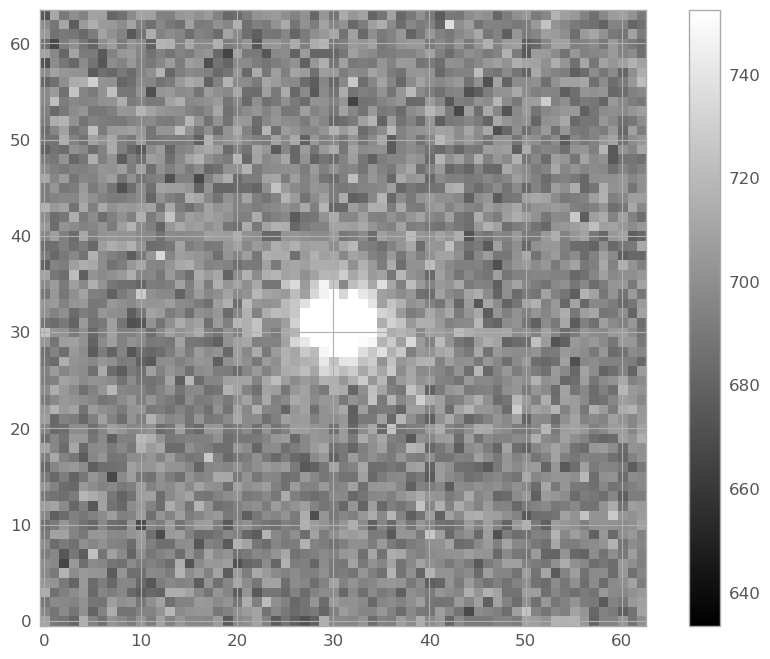

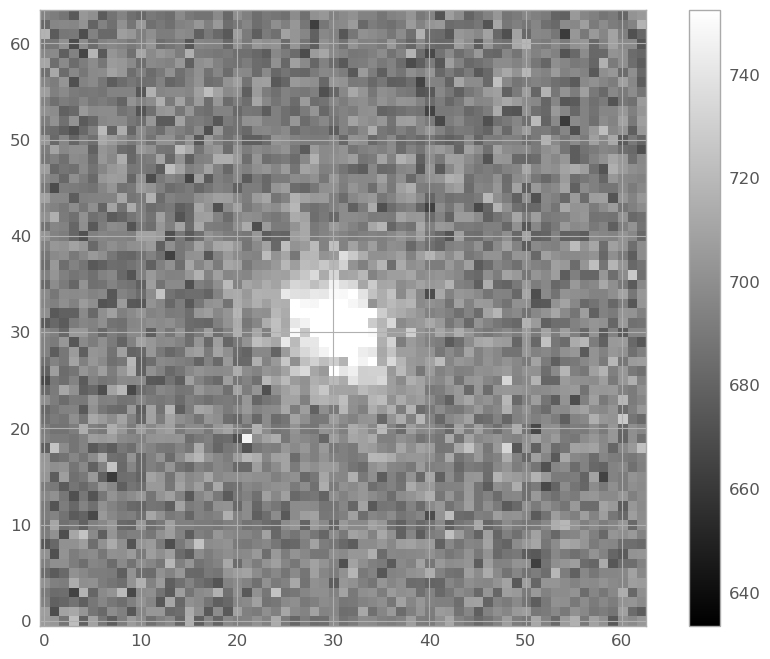

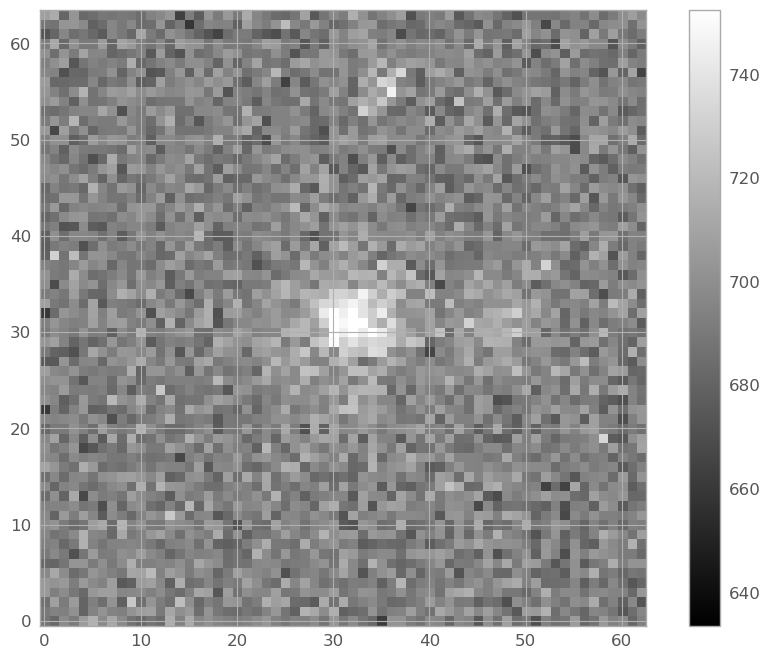

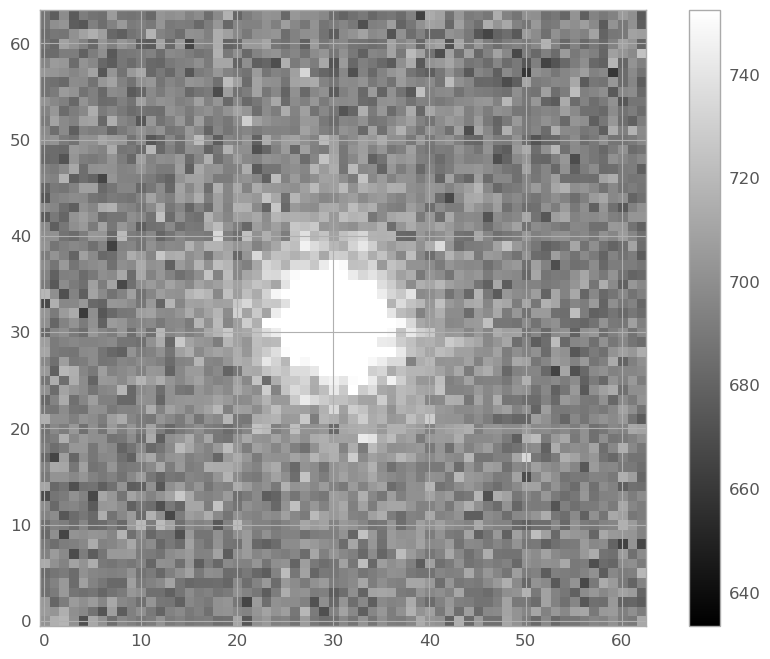

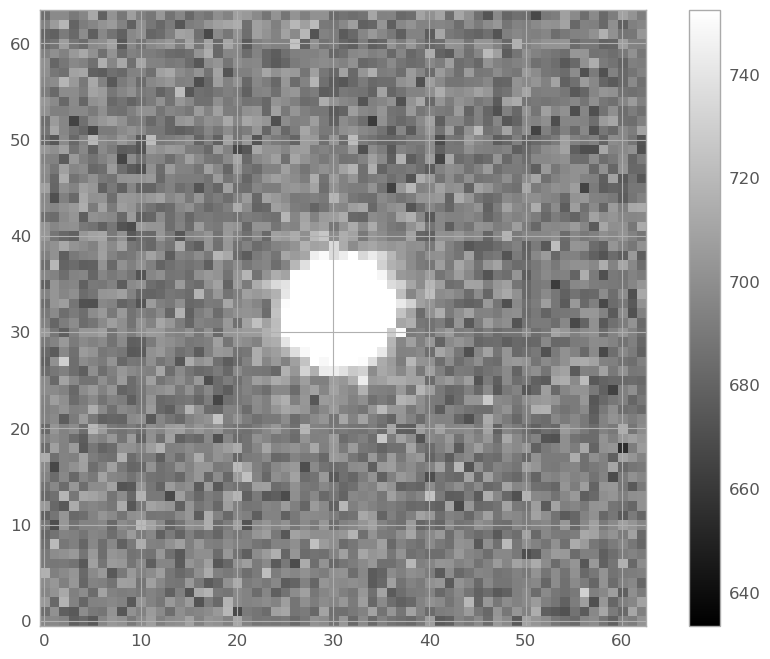

In [17]:
for i in range(len(array_2d)):
    x,y = np.array(array_2d[i], dtype=int)#array_2d[0]
    y = 1032-y
    #print(i,x,y)
    tile = data[y-32:y+32,x-32:x+31]
    SAMOS.display_image(data[y-32:y+32,x-32:x+31],zmin=z0,zmax=z1)
    hdu = fits.PrimaryHDU(data=tile)
    hdu.writeto( working_directory+'/tile_{i_s:03.0f}.fits'.format(i_s=i),overwrite=True)

# READ THE SLIT IMAGE

In [126]:
#FIRST STEP: READ AND MOVE THE FILES
File_type = "TARGET"
#File_NR = '027'
#file  = os.path.join(data_directory_17,'target.'+File_NR+'.fits')
file =os.path.join(data_directory_18,"sci_SLOAN-i_ABELL3120_0085.fits")
print(file)

#hdu = SAMOS.read_SAMI_mosaic(file)
#hdu = fits.read(file)
#Target_Spectra = hdu.data
#hdu.data = Target_Spectra

with fits.open(file) as hdul:
    # Access the primary HDU (header data unit)
    primary_hdu = hdul[0]

    # Access the data array in the primary HDU
    data_mask = primary_hdu.data

    # Access the header of the primary HDU
    header = primary_hdu.header

#restore correct orientation on sky
data_mask = np.flip(data_mask,0)

/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SISI/SAMOS_20241018/sci_SLOAN-i_ABELL3120_0085.fits


In [128]:
data_mask = data_mask/10



(1032, 1056)


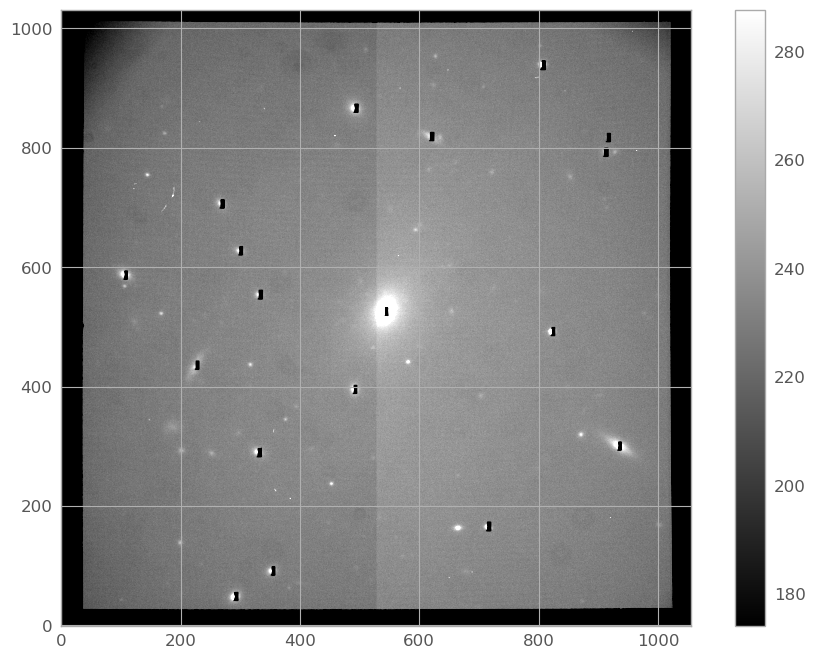

In [130]:
# display setting the limits for the gray scale
median = np.median(data_mask)
stddev = np.std(data_mask)
z0 = median-stddev
z1 = median+stddev
print(data.shape)
SAMOS.display_image(data_mask,zmin=z0,zmax=z1)

292 49


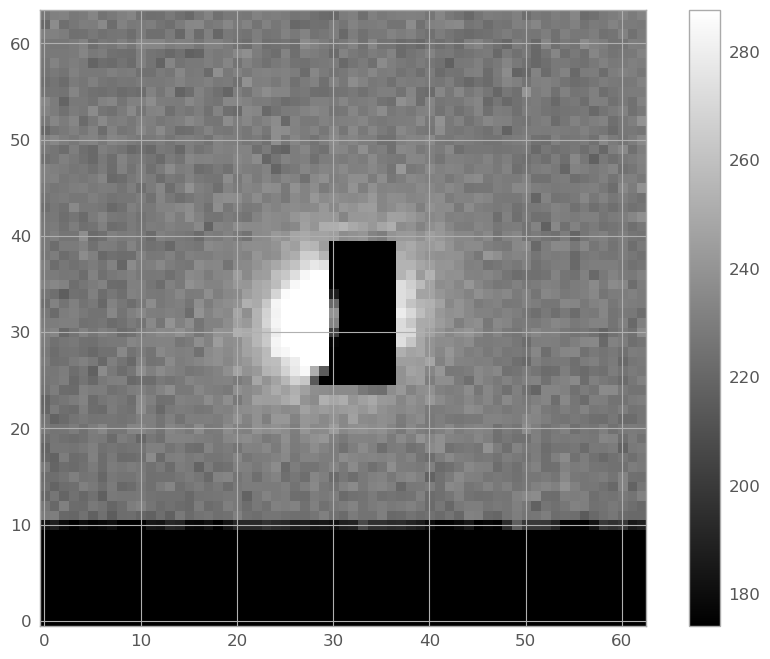

In [133]:
x,y = np.array(array_2d[0], dtype=int)#array_2d[0]
y = 1032-y
print(x,y)
SAMOS.display_image(data_mask[y-32:y+32,x-32:x+31],zmin=z0,zmax=z1)

292 49


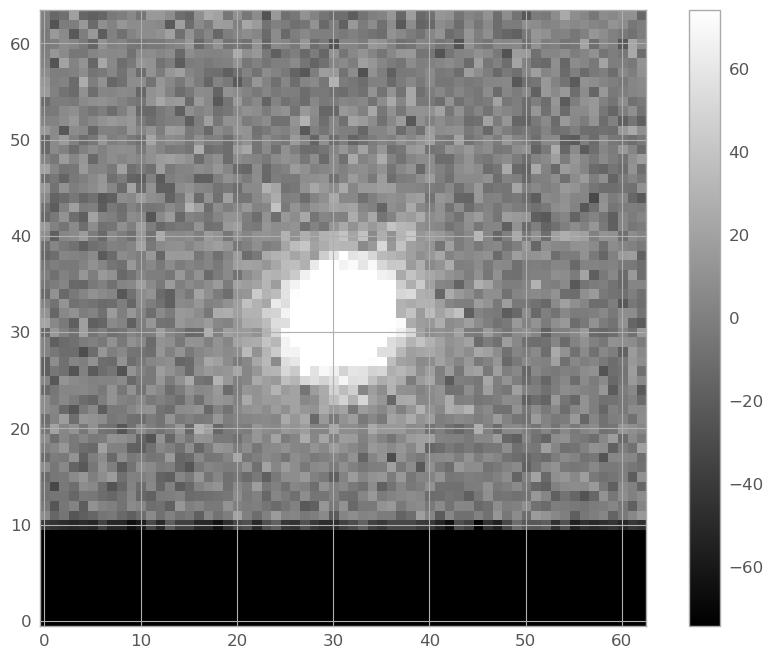

292 49


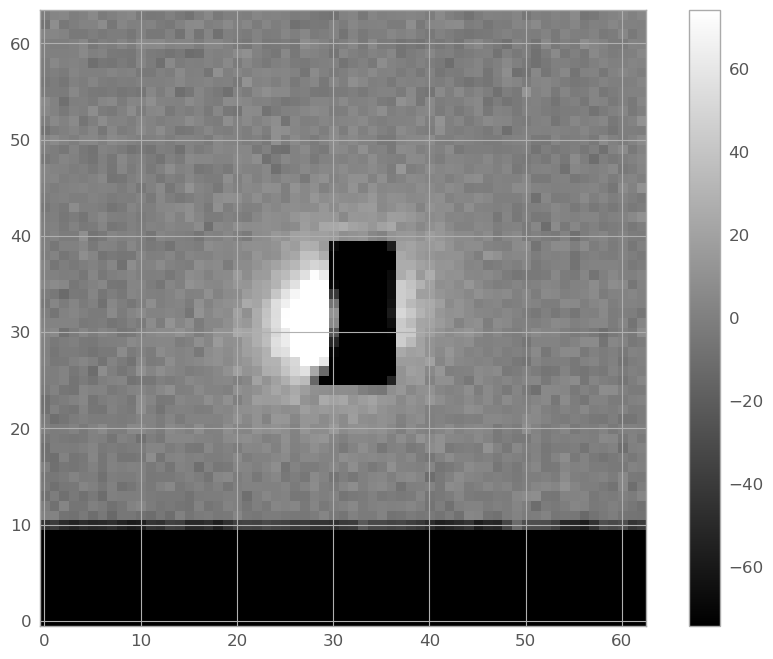

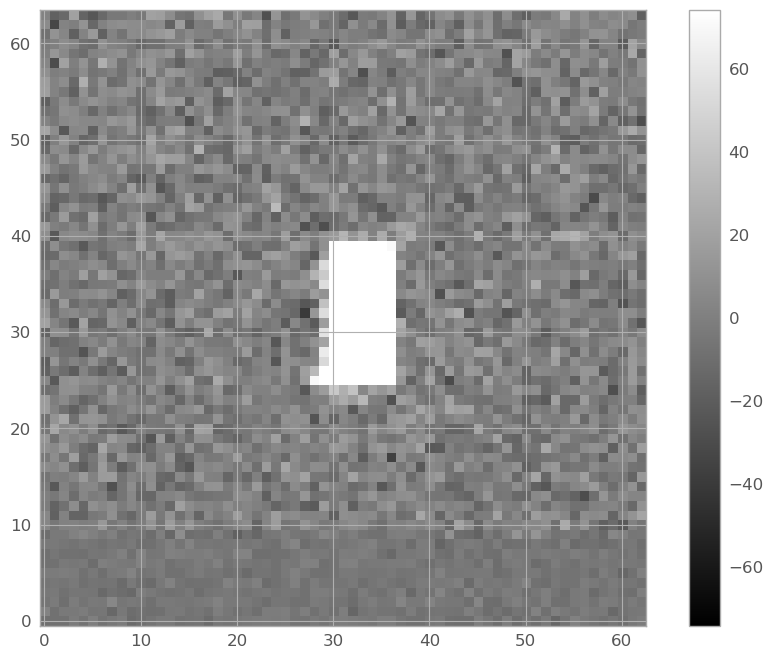

1.074404398289554


In [137]:
tile = data[y-32:y+32,x-32:x+31]
tile = tile - np.median(tile)
median = np.median(tile)
stddev = np.std(tile)
z0 = median-stddev
z1 = median+stddev

x,y = np.array(array_2d[0], dtype=int)#array_2d[0]
y = 1032-y
print(x,y)
SAMOS.display_image(tile,zmin=z0,zmax=z1)

tile_mask = data_mask[y-32:y+32,x-32:x+31]
tile_mask = tile_mask - np.median(tile_mask)

#tile_mask[tile_mask < -20]  = np.median(tile_mask)
x,y = np.array(array_2d[0], dtype=int)#array_2d[0]
y = 1032-y
print(x,y)
SAMOS.display_image(tile_mask,zmin=z0,zmax=z1)

SAMOS.display_image(tile-tile_mask,zmin=z0,zmax=z1)

print(np.sum(tile[10:50,10:50]-tile_mask[10:50,10:50])/np.sum(tile[10:50,10:50]))

27829.0 13811.600000000002
0.50369758165942


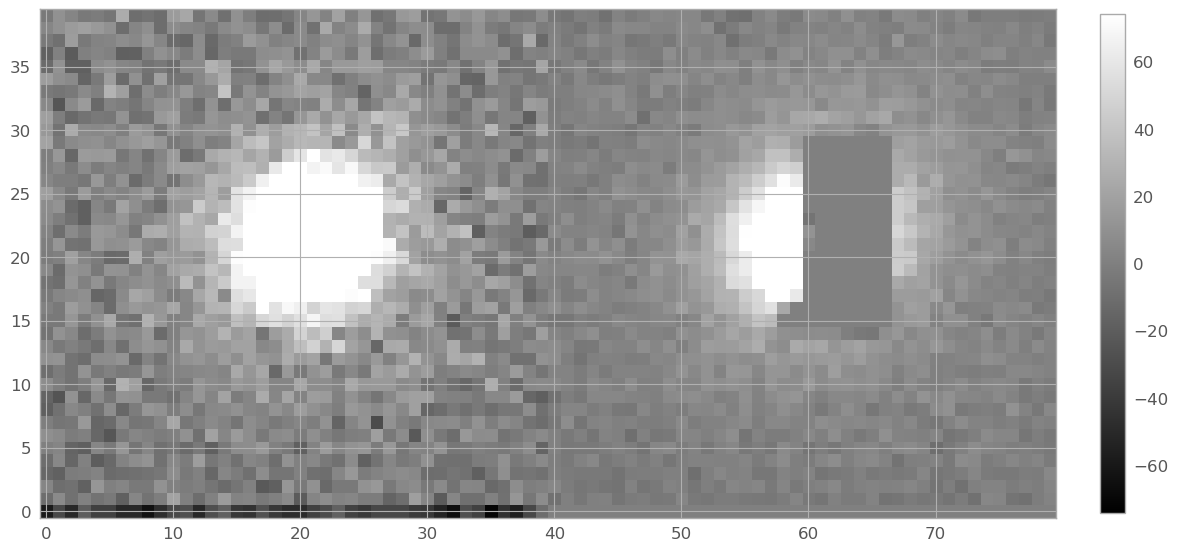

10492.0 6649.200000000009
0.36626000762485617


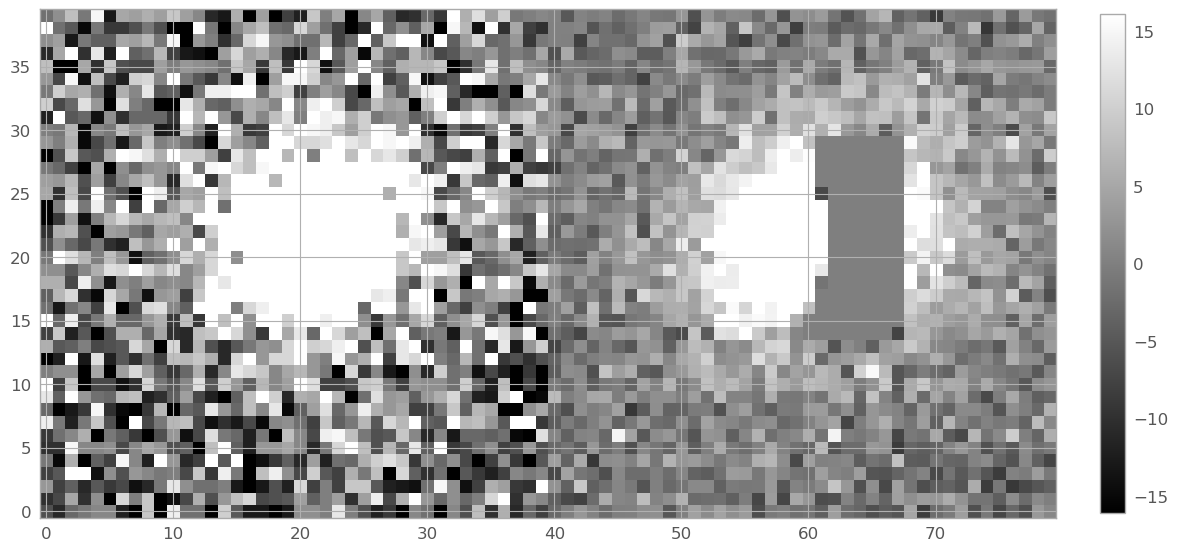

11055.0 4386.700000000009
0.6031931252826768


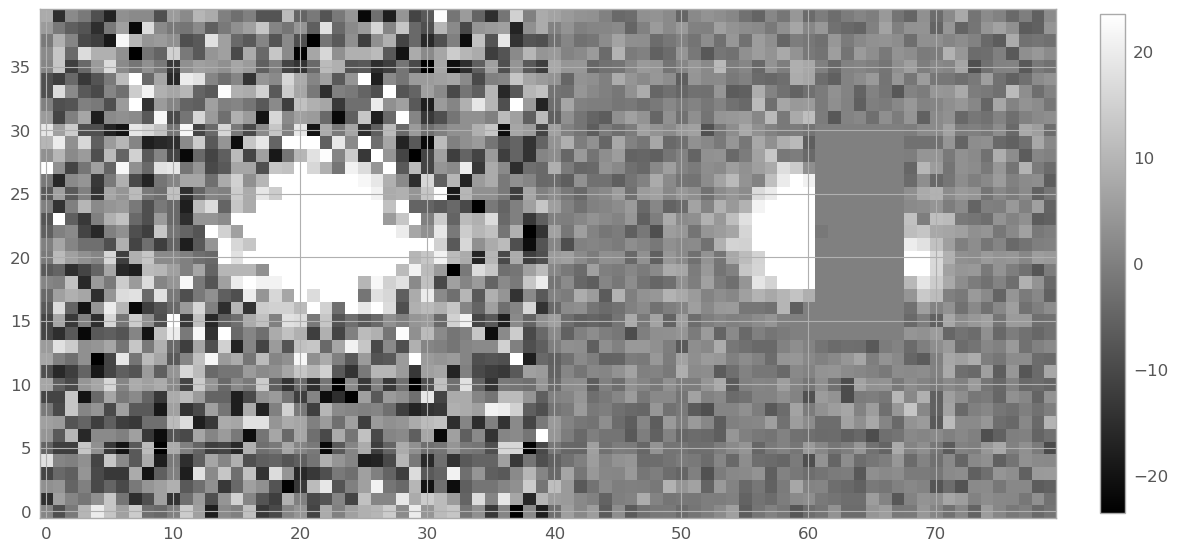

14103.0 6733.499999999982
0.5225483939587334


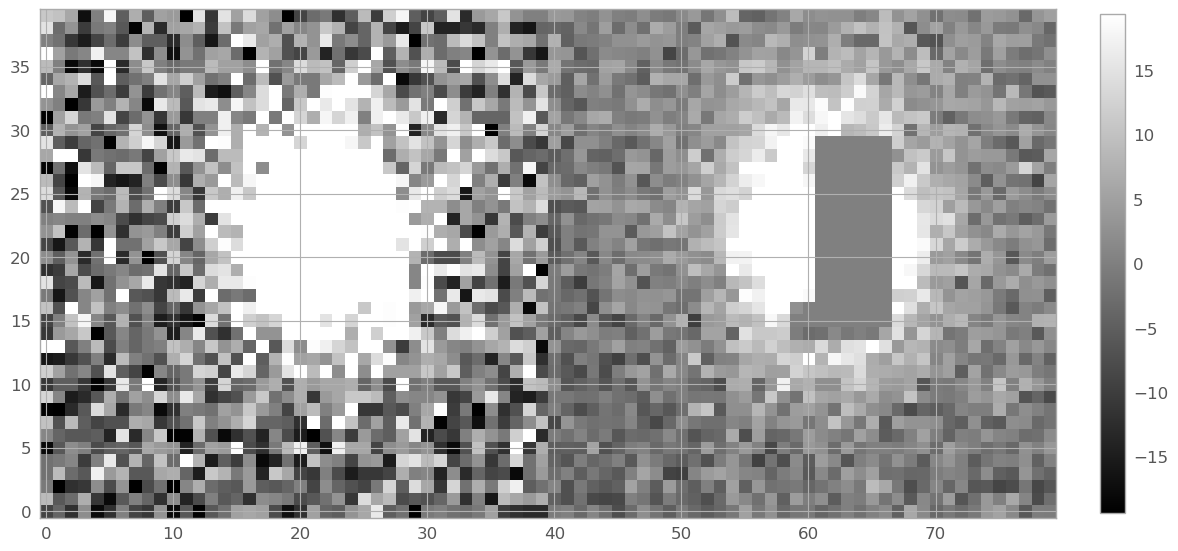

9532.0 7627.1000000000095
0.19984263533361213


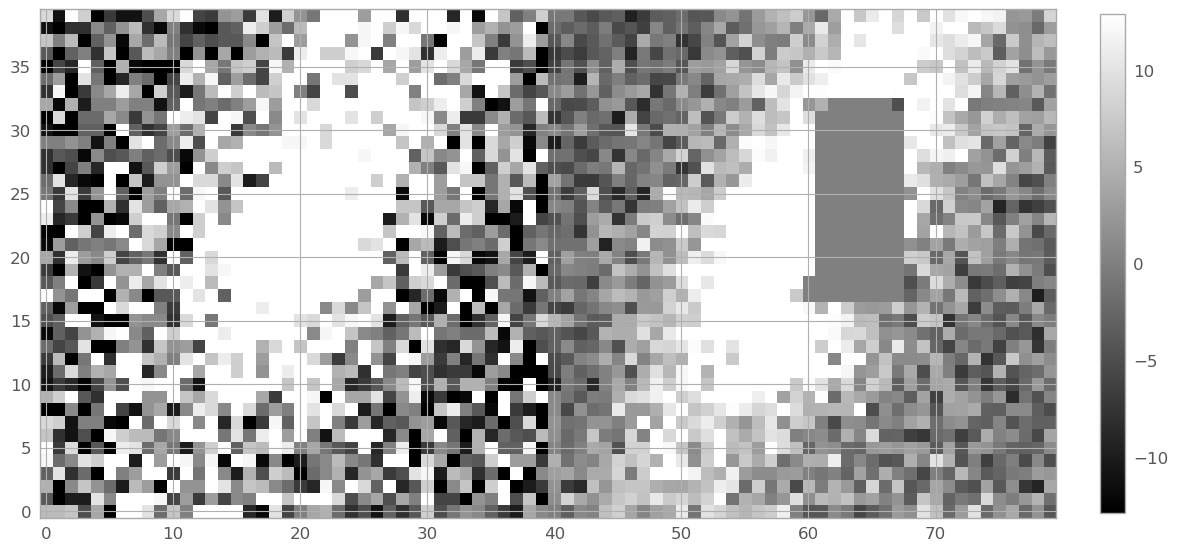

27729.0 11276.300000000001
0.5933391034656857


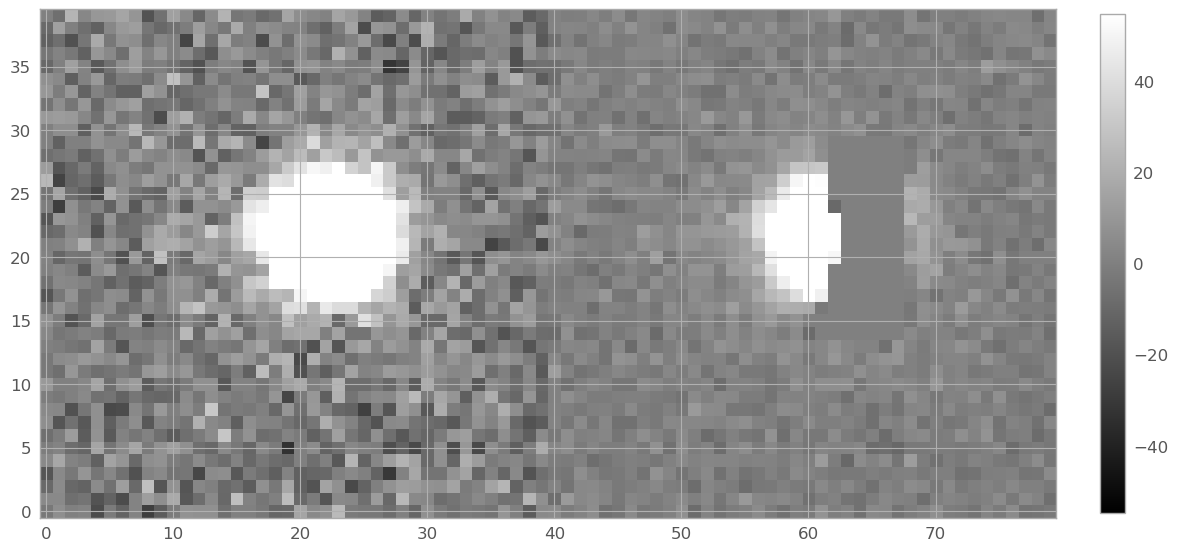

99813.0 71661.49999999999
0.2820424193241363


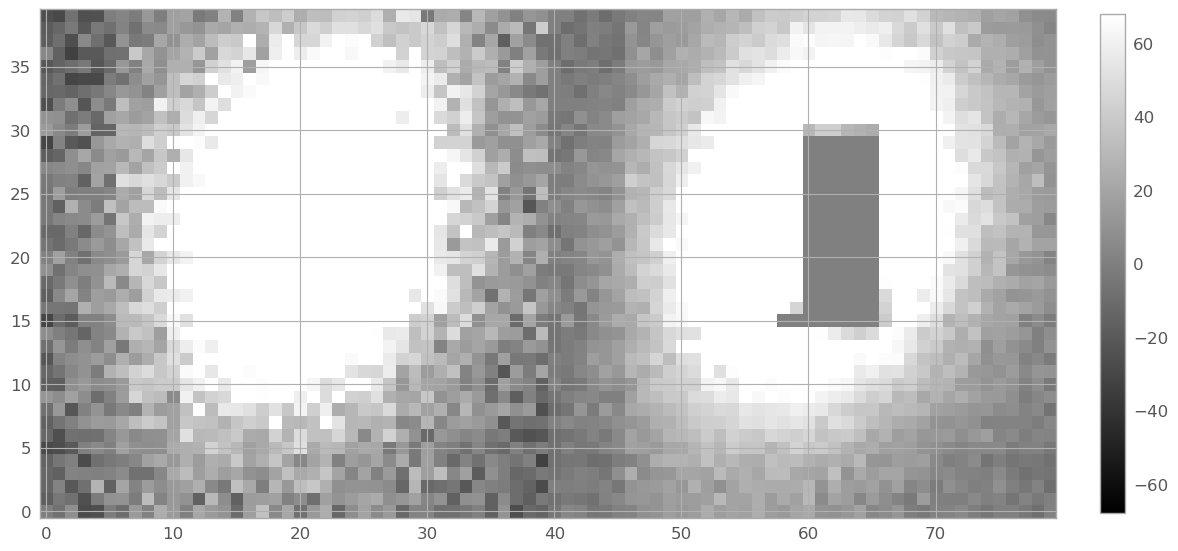

6393.0 3672.000000000009
0.42562177381510885


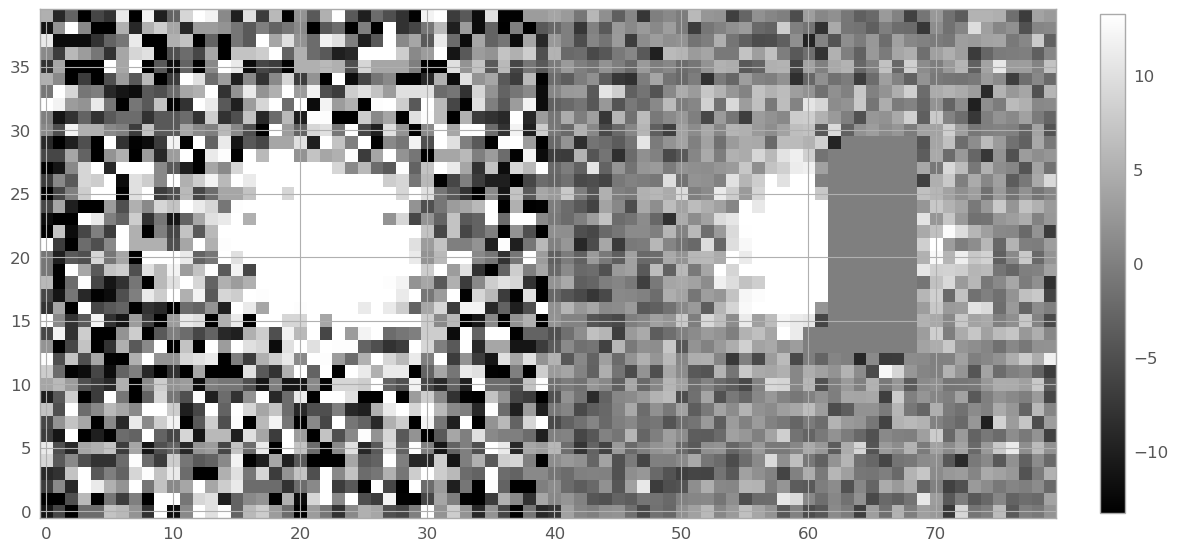

21114.0 13456.499999999993
0.36267405512929857


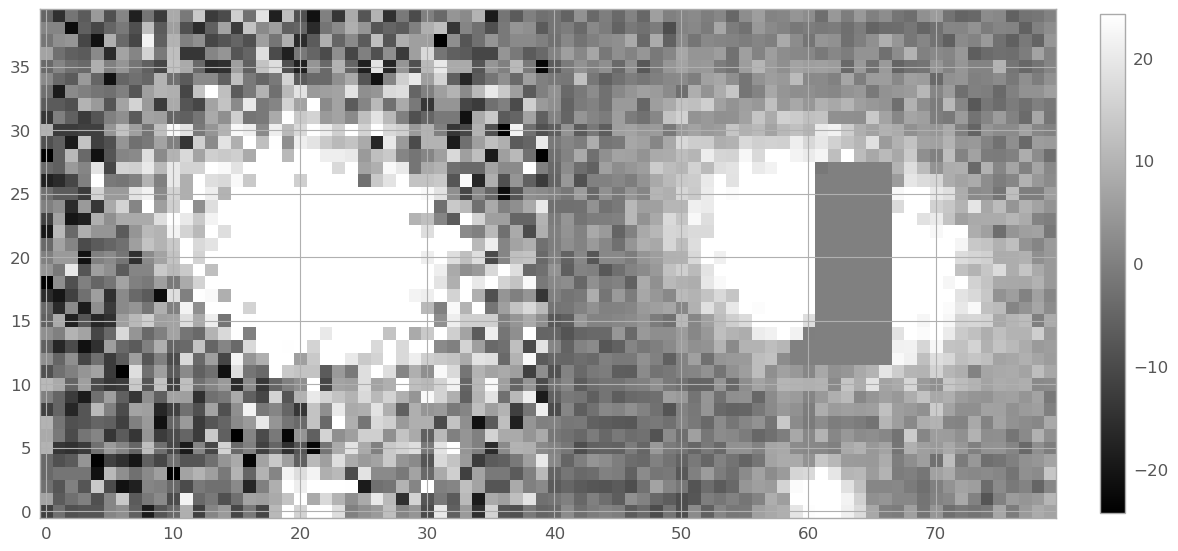

7276.0 3593.2999999999915
0.5061434854315568


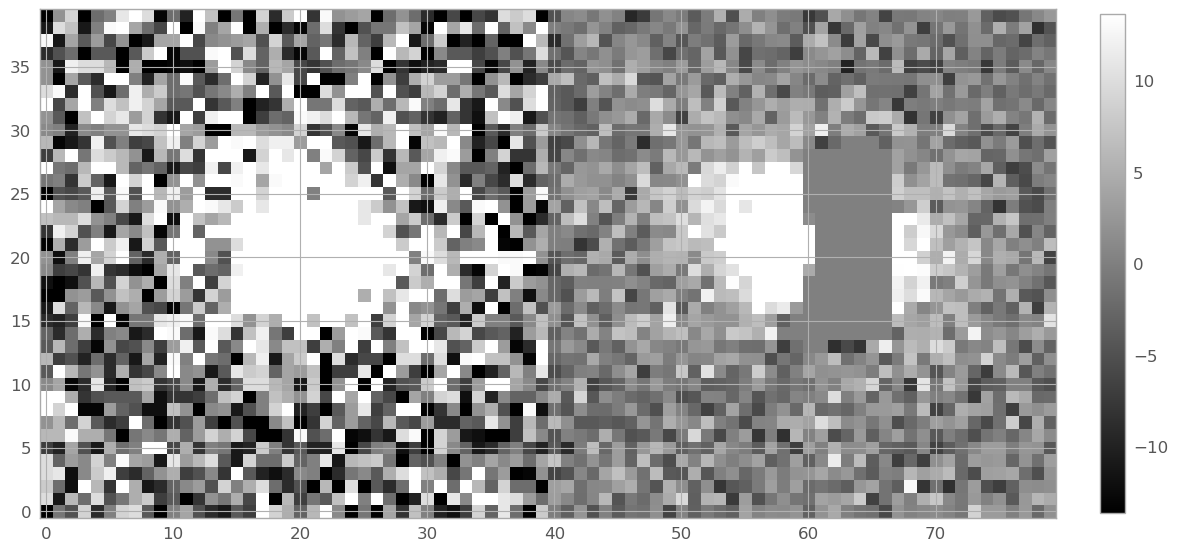

8959.0 5161.700000000008
0.4238531086058703


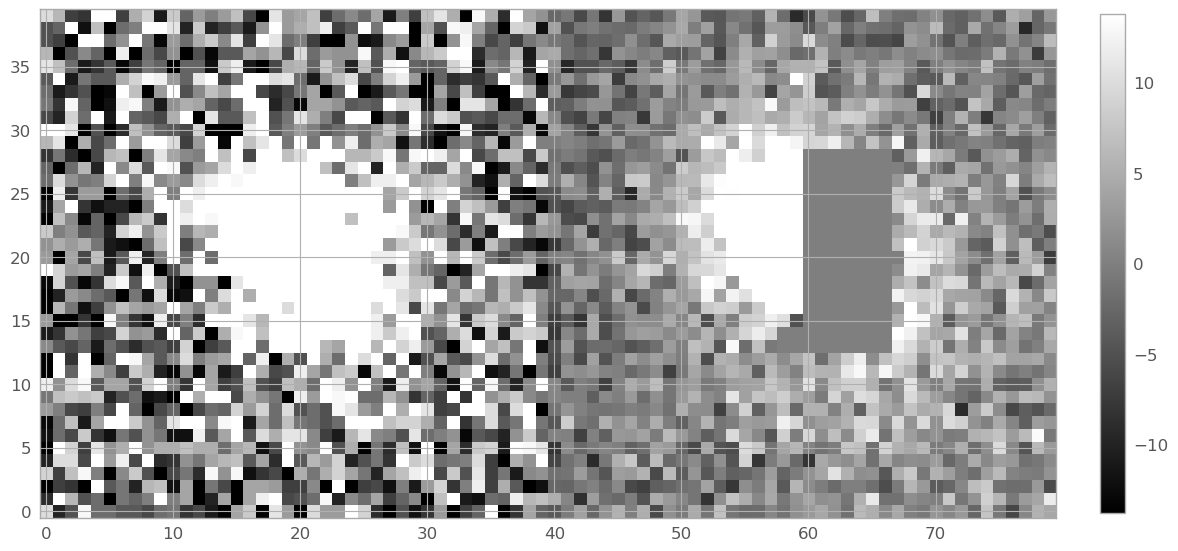

5043.0 3437.999999999991
0.31826293872694994


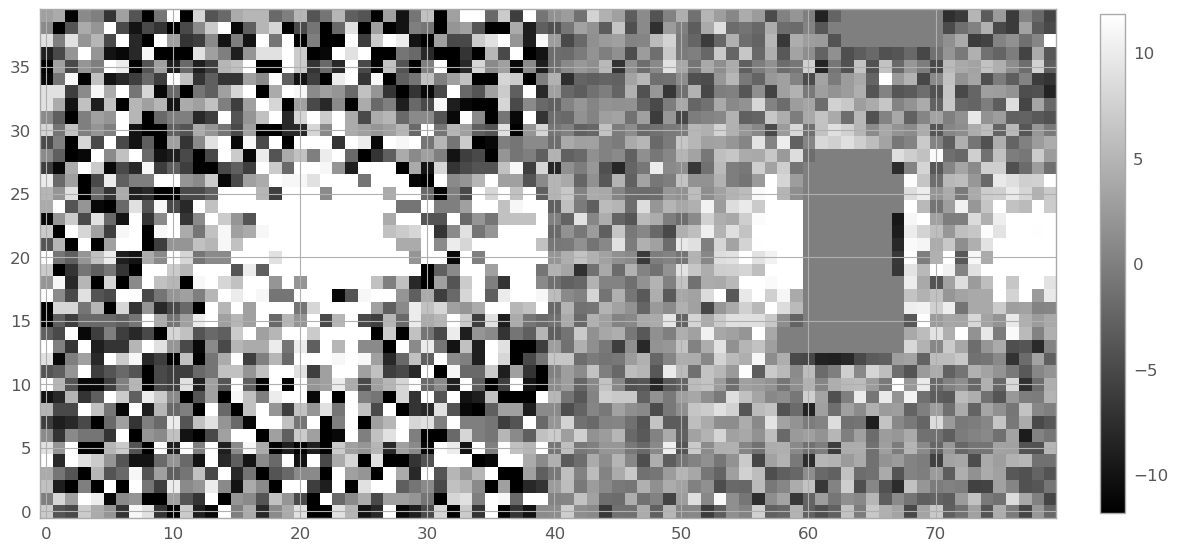

21457.0 14259.50000000001
0.3354383184974596


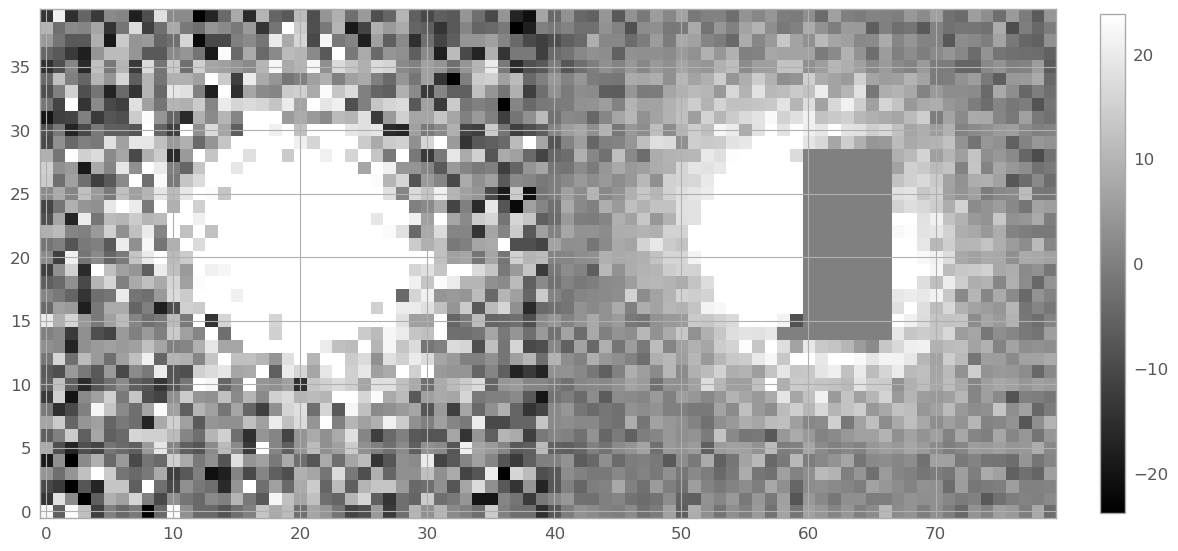

36491.0 9609.399999999992
0.7366638349181993


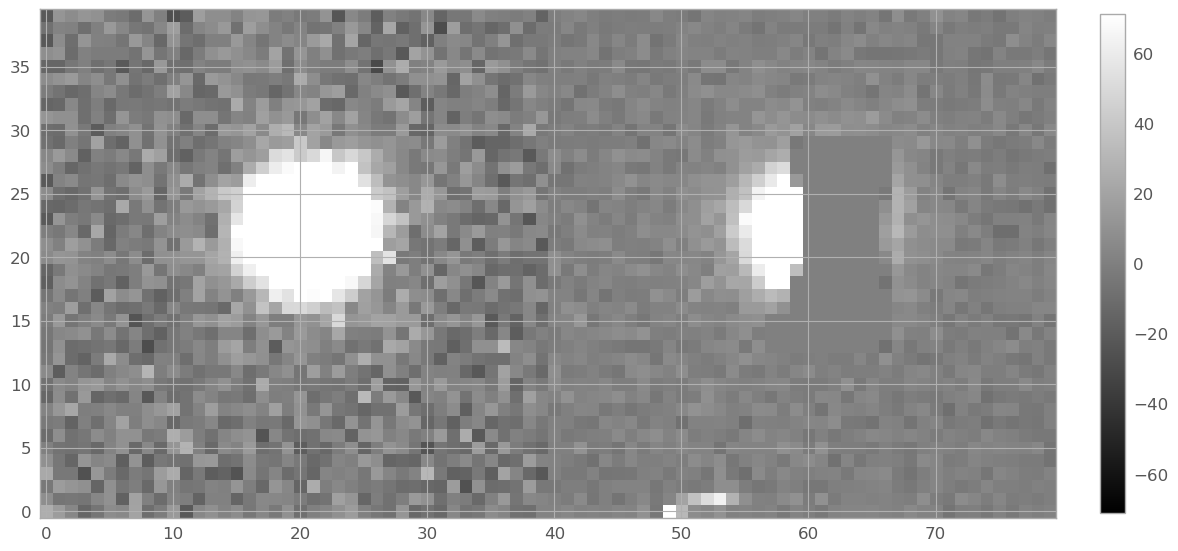

In [193]:
for i in range(len(array_2d)):
    x,y = np.array(array_2d[i], dtype=int)#array_2d[0]
    y = 1032-y

    tile = data[y-32:y+32,x-32:x+31]
    tile = tile - np.median(tile)
    median = np.median(tile)
    stddev = np.std(tile)
    z0 = median-stddev
    z1 = median+stddev

    #SAMOS.display_image(tile,zmin=z0,zmax=z1)
    
    tile_mask = data_mask[y-32:y+32,x-32:x+31]
    tile_mask = tile_mask - np.median(tile_mask)
    
    tile_mask[tile_mask < -10]  = np.median(tile_mask)
    #SAMOS.display_image(tile_mask,zmin=z0,zmax=z1)
    
    #SAMOS.display_image(tile-tile_mask,zmin=z0,zmax=z1)
    print(np.sum(tile[10:50,10:50]),np.sum(tile_mask[10:50,10:50]))
    print(np.sum(tile[10:50,10:50]-tile_mask[10:50,10:50])/np.sum(tile[10:50,10:50]))

    tiles_combined = np.zeros((40,80))
    tiles_combined[:,0:40] = tile[10:50,10:50]
    tiles_combined[:,40:80] = tile_mask[10:50,10:50]
    SAMOS.display_image(tiles_combined,zmin=z0,zmax=z1)
    hdu = fits.PrimaryHDU(data=tiles_combined)
    hdu.writeto( working_directory+'/tile_{i_s:03.0f}.fits'.format(i_s=i),overwrite=True)

In [179]:

tiles_combined = np.zeros((40,80))
tiles_combined.shape

(40, 81)

In [181]:
tiles_combined[:,0:40] = tile[10:50,10:50]
tiles_combined[:,40:80] = tile_mask[10:50,10:50]

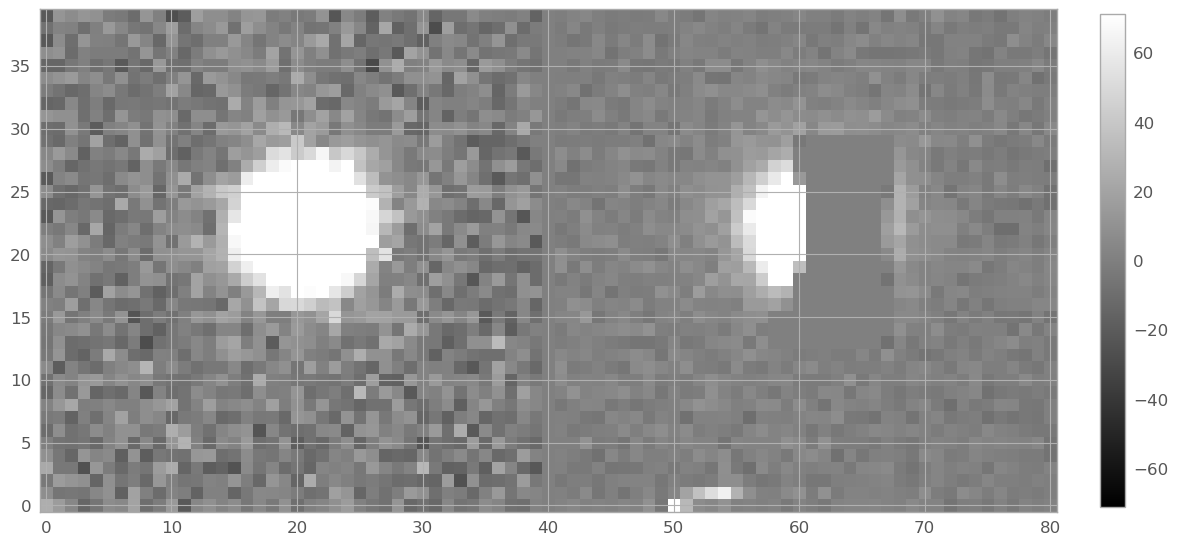

In [183]:
SAMOS.display_image(tiles_combined,zmin=z0,zmax=z1)